<a href="https://colab.research.google.com/github/phylypo/TimeSeriesPrediction/blob/main/Time_Series_DL_TFT_N_BEATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Time Series Forecasting from Statistical to Recent ML Approaches 

Topics for this notebook in bold:
- Introduction to TS
- Decompose (*Time_Series_FFT.ipynb*)
 - Gen Synthic
 - Decompose FFT
- Naive approaches
- Statistical (*Time_Series_ES_ARIMA.ipynb*)
 - Smoothing techniques
 - ARIMA
 - State Space (*Time_Series_StateSpace.ipynb*)
- ML (*Time_Series_ML-LR_XGBoost.ipynb*)
  - Linear Regression
  - Decision Tree (XGBoost)
- DL (*Time_Series_DL_LSTM_CNN.ipynb*)
 - LSTM, CNN + LSTM
 - TCN (*Time_Series_DL_TCN_LSTNet.ipynb*)
 - LSTNet
 - **TFT (*Time_Series_DL_TFT_N-BEATS.ipynb*)**
 - **N-BEATS**
- Commercial: (*Time_Series_Commercial.ipynb*)
 - Facebook Prophet
 - Amazon DeepAR

## Deep Learning


**Convolutional Neural Network (CNN)**

1. Causual Convolution

> $h_t^{l+1} = A(\sum\limits_{\tau=0}^k{W(l,\tau)h_{t-\tau}^l})$
- $h_t^l$ : hidden state at layer $l$ at time $t$
- $W(l,\tau)$: filter weight at layer $l$
- $A$: activation function like sigmoid or relu

2. Dilated Convolution: Dilated convolutions can hence
be interpreted as convolutions of a down-sampled version of the lower layer features – reducing
resolution to incorporate information from the distant past. As such, by increasing the dilation rate
with each layer, dilated convolutions can gradually aggregate information at different time blocks,
allowing for more history to be used in an efficient manner.

> $h_t^{l+1} = A(\sum\limits_{\tau=0}^{\lfloor{k/d_l}\rfloor}{W(l,\tau)h_{t-\tau}^l})$
- $d_l$ dilation rate on specific layer

**Recurrent Neural Network (RNN)**

RNN used as sequence modeling for NLP. It has internal state that summarize the past information and get recursivel udpate with new data at each time step.

- use in sequence modeling  in NLP
- add memory cell in LSTM

> $y_{t+1} = \gamma_y(W_y x_t + b_y)$
> $z_t = \gamma_z ( W_{z_1} z_{t-1} + W_{z_2}y_t + W_{z_3} x_t + W_{z_4}s + b_z )$
- $z_t$: hidden state at time $t$
- $W, b$: linear weigths and biases
- $\gamma$: activation function

**Long Short-Term Memory (LSTM)**

> $z_t = o_t \odot \tanh(c_t)$
- $o_t$: output gate,
- $c_t$: cell state that includes $z_t$

**Attention Mechanisms**

Improvement in long term dependcency learning in NLP. It aggregates temporal features using dynamically genterated weights allow the network to focus on significat time steps in the past in ven far back look back window. Using key-value lookup for a query $q$:

> $h_t = \sum\limits_{\tau=0}^k{\alpha(k_t, q_\tau)v_{t-\tau}}$

> - $k_t$: key
> - $q_\tau$: query
> - $v_{t-\tau}$: intermediate features produced at different time steps
> - $\alpha(k_t,q_\tau)$ : attention weight at time $t$

![](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/02d49b4dbaf8c093034918a76648fea53961753d/2-Figure1-1.png)
Figure 1: Incorporating temporal information using different encoder architectures. <br/>

*("Time Series Forecasting With Deep Learning: A Survey",
Bryan Lim, Stefan)*



## TFT
Temporal Fusion Transformers (TFT)


"Temporal Fusion Transformers for Interpretable Multi-horizon Time Series Forecasting"
Bryan Lim, Sercan O. Arık, Nicolas Loeffb, Tomas Pfister, Dec 2019 ([Paper](https://arxiv.org/abs/1912.09363.pdf))


![multi-horizon](https://storage.googleapis.com/groundai-web-prod/media/users/user_236644/project_402585/images/Schematic.png)


Compare to other models:
ARIMA, ETS, TRMF, DeepAR, DSSM, ConvTrans, Seq2Seq, MQRNN
- ETS (Error, Trend, Seasonal) method is an approach method for forecasting time series univariate. (https://otexts.com/fpp2/arima-ets.html)
- Deep State-Space Models (DSSM) [6] adopt a similar approach, utilizing LSTMs to generate parameters of a predefined linear state-space model with predictive distributions produced via Kalman filtering – with extensions for multivariate time series data in [21].
- Deep AR [9] which uses stacked LSTM layers to generate parameters of one-step-ahead Gaussian predictive distributions
- The Multi-horizon Quantile Recurrent Forecaster (MQRNN) [10] uses LSTM or convolutional encoders to generate context vectors which are fed into multi-layer perceptrons (MLPs) for each horizon.


In [11] a multi-modal attention mechanism is used with LSTM encoders to construct context vectors for a bi-directional LSTM decoder. Despite performing better than LSTM-based iterative methods, interpretability remains challenging for such standard direct methods.
(C. Fan, et al., Multi-horizon time series forecasting with temporal attention learning, 2019.)

By interpreting attention patterns, TFT can provide insightful explanations about temporal dynamics, and do so while maintaining state-ofthe-art performance on a variety of datasets.

![data](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/b941cb83f4aad597bf7ca72613d130c714d65d54/7-Table1-1.png)

Time Series Interpretability with Attention: 
- Attention mechanisms are used in translation [17], image classification [22] or tabular learning [23]
to identify salient portions of input for each instance using the magnitude of attention weights. 
- Recently, they have been adapted for time series with interpretability motivations [7, 12, 24], using LSTM-based [25] and transformer-based [12] architectures. However, this was done without considering the importance
of static covariates (as the above methods blend variables at each input). 
- TFT alleviates this by using separate encoder-decoder attention for static features at each time step on top of the self-attention to determine the contribution time-varying inputs.

Ref:
- https://arxiv.org/abs/1912.09363.pdf
- https://github.com/google-research/google-research/tree/master/tft
- https://github.com/louisyuzhe/deeplearning_forecast
- https://pytorch-forecasting.readthedocs.io/en/latest/tutorials/stallion.html

## TFT Code

### Install libraries

In [ ]:
!pip install pytorch_lightning
!pip install pytorch_forecasting

     |████████████████████████████████| 563kB 6.9MB/s 
     |████████████████████████████████| 829kB 11.2MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 276kB 16.5MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=36136d0ffa59b82b5b460e0be5a7dd2675cf837b94ac5ecb92ef704ed7ab72f9
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=d584b06a897b9c7e43a7d73925a7714666e3791cc9b58a6a7c05fd70558231e8
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built future PyYAML
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully unin

In [ ]:
#https://pytorch-forecasting.readthedocs.io/en/latest/tutorials/stallion.html
import warnings
from pathlib import Path
import pandas as pd
import numpy as np
import torch
import copy


import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, Baseline
from pytorch_forecasting.data import GroupNormalizer

from pytorch_forecasting.metrics import PoissonLoss, QuantileLoss, SMAPE
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



For this tutorial, we will use the Stallion dataset from Kaggle describing sales of various beverages. Our task is to make a six-month forecast of the sold volume by stock keeping units (SKU), that is products, sold by an agency, that is a store. There are about 21 000 monthly historic sales records. In addition to historic sales we have information about the sales price, the location of the agency, special days such as holidays, and volume sold in the entire industry.

### Loading data

In [ ]:
from pytorch_forecasting.data.examples import get_stallion_data

data = get_stallion_data()

# add time index
data["time_idx"] = data["date"].dt.year * 12 + data["date"].dt.month
data["time_idx"] -= data["time_idx"].min()

# add additional features
data["month"] = data.date.dt.month.astype(str).astype("category")  # categories have be strings
data["log_volume"] = np.log(data.volume + 1e-8)
data["avg_volume_by_sku"] = data.groupby(["time_idx", "sku"], observed=True).volume.transform("mean")
data["avg_volume_by_agency"] = data.groupby(["time_idx", "agency"], observed=True).volume.transform("mean")

# we want to encode special days as one variable and thus need to first reverse one-hot encoding
special_days = [
    "easter_day",
    "good_friday",
    "new_year",
    "christmas",
    "labor_day",
    "independence_day",
    "revolution_day_memorial",
    "regional_games",
    "fifa_u_17_world_cup",
    "football_gold_cup",
    "beer_capital",
    "music_fest",
]
data[special_days] = data[special_days].apply(lambda x: x.map({0: "-", 1: x.name})).astype("category")
data.sample(10, random_state=521)

,agency,sku,volume,date,industry_volume,soda_volume,avg_max_temp,price_regular,price_actual,discount,avg_population_2017,avg_yearly_household_income_2017,easter_day,good_friday,new_year,christmas,labor_day,independence_day,revolution_day_memorial,regional_games,fifa_u_17_world_cup,football_gold_cup,beer_capital,music_fest,discount_in_percent,timeseries,time_idx,month,log_volume,avg_volume_by_sku,avg_volume_by_agency
291,Agency_25,SKU_03,0.5076,2013-01-01,492612703,718394219,25.845238,1264.162234,1152.473405,111.688829,53598,95032,-,-,new_year,-,-,-,-,-,-,-,-,-,8.835008,228,0,1,-0.678062,1225.306376,99.650400
871,Agency_29,SKU_02,8.7480,2015-01-01,498567142,762225057,27.584615,1316.098485,1296.804924,19.293561,28329,93614,-,-,new_year,-,-,-,-,-,-,-,-,-,1.465966,177,24,1,2.168825,1634.434615,11.397086
19532,Agency_47,SKU_01,4.9680,2013-09-01,454252482,789624076,30.665957,1269.250000,1266.490490,2.759510,32183,128574,-,-,-,-,-,independence_day,-,-,-,-,-,-,0.217413,322,8,9,1.603017,2625.472644,48.295650
2089,Agency_53,SKU_07,21.6825,2013-10-01,480693900,791658684,29.197727,1193.842373,1128.124395,65.717978,1729177,111048,-,-,-,-,-,-,-,-,-,-,beer_capital,-,5.504745,240,9,10,3.076505,38.529107,2511.035175
9755,Agency_17,SKU_02,960.5520,2015-03-01,515468092,871204688,23.608120,1338.334248,1232.128069,106.206179,147910,123013,-,-,-,-,-,-,-,-,-,-,-,music_fest,7.935699,259,26,3,6.867508,2143.677462,396.022140
7561,Agency_05,SKU_03,1184.6535,2014-02-01,425528909,734443953,28.668254,1369.556376,1161.135214,208.421162,3044268,182944,-,-,-,-,-,-,-,-,-,-,-,-,15.218151,21,13,2,7.077206,1566.643589,1881.866367
19204,Agency_11,SKU_05,5.5593,2017-08-01,623319783,1049868815,31.915385,1922.486644,1651.307674,271.178970,135561,100461,-,-,-,-,-,-,-,-,-,-,-,-,14.105636,17,55,8,1.715472,1385.225478,109.699200
8781,Agency_48,SKU_04,4275.1605,2013-03-01,509281531,892192092,26.767857,1761.258209,1546.059670,215.198539,1739969,210213,easter_day,good_friday,-,-,-,-,-,-,-,-,-,music_fest,12.218455,151,2,3,8.360577,1757.950603,1925.272108
2540,Agency_07,SKU_21,0.0000,2015-10-01,544203593,761469815,28.987755,0.000000,0.000000,0.000000,1868030,175785,-,-,-,-,-,-,-,-,-,-,-,-,0.000000,300,33,10,-18.420681,0.000000,2418.719550
12084,Agency_21,SKU_03,46.3608,2017-04-01,589969396,940912941,32.478910,1675.922116,1413.571789,262.350327,26635,130092,easter_day,good_friday,-,-,-,-,-,-,-,-,-,-,15.654088,181,51,4,3.836454,2034.293024,109.381800


### Training

In [ ]:
max_prediction_length = 6
max_encoder_length = 24
training_cutoff = data["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="volume",
    group_ids=["agency", "sku"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["agency", "sku"],
    static_reals=["avg_population_2017", "avg_yearly_household_income_2017"],
    time_varying_known_categoricals=["special_days", "month"],
    variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    time_varying_known_reals=["time_idx", "price_regular", "discount_in_percent"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=[
        "volume",
        "log_volume",
        "industry_volume",
        "soda_volume",
        "avg_max_temp",
        "avg_volume_by_agency",
        "avg_volume_by_sku",
    ],
    target_normalizer=GroupNormalizer(
        groups=["agency", "sku"], coerce_positive=1.0
    ),  # use softplus with beta=1.0 and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time for each series
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 128  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)
print(type(val_dataloader))

torch.utils.data.dataloader.DataLoader


In [ ]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, y in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

293.0088195800781

In [ ]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=0,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning:

You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Number of parameters in network: 29.7k



   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 1.3 K 
3  | prescalers                         | ModuleDict                      | 256   
4  | static_variable_selection          | VariableSelectionNetwork        | 3.4 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 8.0 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 2.7 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

suggested learning rate: 0.06760829753919811


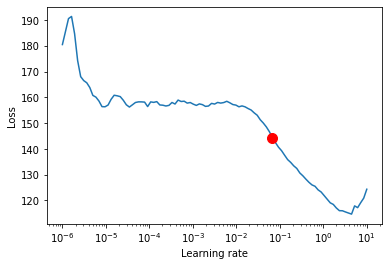

In [ ]:
# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [ ]:
# can be stopped at any point -- did at 24 epochs
# fit network
trainer.fit(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
)


   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 1.3 K 
3  | prescalers                         | ModuleDict                      | 256   
4  | static_variable_selection          | VariableSelectionNetwork        | 3.4 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 8.0 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 2.7 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

### Forecasting

In [ ]:
# can cancel, but wait after clicking -- take time to cancel
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=200,
    max_epochs=10,#50
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 128),
    hidden_continuous_size_range=(8, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)


[I 2020-11-26 20:29:37,485] A new study created in memory with name: no-name-7f4430cd-7985-4ff1-905f-99cd5d4f6935
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning:

You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
[W 2020-11-26 20:29:37,533] Trial 0 failed because of the following error: StopIteration()
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/_optimize.py", line 189, in _run_trial
    value = func(trial)
  File "/usr/local/lib/python3.6/dist-packages/pytorch_forecasting/models/temporal_fusion_transformer/tuning.py", line 199, in objective
    trainer.fit(model, train_dataloader=train_dataloader, val_dataloaders=val_dataloader)
  File "/usr/local/lib/python3.6/dist-packages/pytorch_lightning/trainer/trainer.py", line 445, in fit
 

StopIteration: ignored

In [ ]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [ ]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

In [ ]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

In [ ]:
for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);

In [ ]:
# worst performer
# calcualte metric by which to display
predictions = best_tft.predict(val_dataloader)
mean_losses = SMAPE(reduction="none")(predictions, actuals).mean(1)
indices = mean_losses.argsort(descending=True)  # sort losses
for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(x, raw_predictions, idx=indices[idx], add_loss_to_title=SMAPE());

In [ ]:
predictions, x = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(x, predictions)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals);

In [ ]:
#prediction on new data
# select last 24 months from data (max_encoder_length is 24)
encoder_data = data[lambda x: x.time_idx > x.time_idx.max() - max_encoder_length]

# select last known data point and create decoder data from it by repeating it and incrementing the month
last_data = data[lambda x: x.time_idx == x.time_idx.max()]
decoder_data = pd.concat(
    [last_data.assign(date=lambda x: x.date + pd.offsets.MonthBegin(i)) for i in range(1, max_prediction_length + 1)],
    ignore_index=True,
)

# add time index consistent with "data"
decoder_data["time_idx"] = decoder_data["date"].dt.year * 12 + decoder_data["date"].dt.month
decoder_data["time_idx"] += encoder_data["time_idx"].max() + 1 - decoder_data["time_idx"].min()

# adjust additional time feature(s)
decoder_data["month"] = decoder_data.date.dt.month.astype(str).astype("category")  # categories have be strings

# combine encoder and decoder data
new_prediction_data = pd.concat([encoder_data, decoder_data], ignore_index=True)

In [ ]:
new_raw_predictions, new_x = best_tft.predict(new_prediction_data, mode="raw",return_x=True)

for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(new_x, new_raw_predictions, idx=idx, show_future_observed=False);

In [ ]:
# interpret model
interpretation = best_tft.interpret_output(raw_predictions, reduction="sum")
best_tft.plot_interpretation(interpretation)

### Use AirPassenger Dataset

In [ ]:
# using AirPassengers
# download data file
!curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv

import pandas as pd
import numpy as np

df = pd.read_csv('AirPassengers.csv')

data = df
data.dtypes #Month object
data['date2'] = pd.DatetimeIndex(data['Month'])
df.dtypes   #Month datetime64[ns]

data.index  #RangeIndex(start=0, stop=144, step=1)
#data = data.set_index('date2')
data.index  #DatetimeIndex([...dtype='datetime64[ns]', name='Month', length=144, freq=None)
data["series"] = 0
data["time_idx"] = np.arange(len(df))
data["value"] = data["AirPassengers"]
data["date"] = pd.Timestamp("2020-01-01") + pd.to_timedelta(data.time_idx, "D")
a = list(np.arange(12)+1)
from itertools import cycle, islice
df['static'] = list(islice(cycle(a), len(df))) # cycle from 1-12 to represent months
data.head(20)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1748  100  1748    0     0   7134      0 --:--:-- --:--:-- --:--:--  7134


,Month,AirPassengers,date2,series,time_idx,value,date,static
0,1949-01,112,1949-01-01,0,0,112,2020-01-01,1
1,1949-02,118,1949-02-01,0,1,118,2020-01-02,2
2,1949-03,132,1949-03-01,0,2,132,2020-01-03,3
3,1949-04,129,1949-04-01,0,3,129,2020-01-04,4
4,1949-05,121,1949-05-01,0,4,121,2020-01-05,5
5,1949-06,135,1949-06-01,0,5,135,2020-01-06,6
6,1949-07,148,1949-07-01,0,6,148,2020-01-07,7
7,1949-08,148,1949-08-01,0,7,148,2020-01-08,8
8,1949-09,136,1949-09-01,0,8,136,2020-01-09,9
9,1949-10,119,1949-10-01,0,9,119,2020-01-10,10


In [ ]:
# copy just needed columns
cols = ["series","time_idx", "value", "static", "date"]
data["value"]= data["value"].astype(float)
data = data[cols]
data

,series,time_idx,value,static,date
0,0,0,112.0,1,2020-01-01
1,0,1,118.0,2,2020-01-02
2,0,2,132.0,3,2020-01-03
3,0,3,129.0,4,2020-01-04
4,0,4,121.0,5,2020-01-05
...,...,...,...,...,...
139,0,139,606.0,8,2020-05-19
140,0,140,508.0,9,2020-05-20
141,0,141,461.0,10,2020-05-21
142,0,142,390.0,11,2020-05-22


In [ ]:
max_prediction_length = 12
max_encoder_length = 36
training_cutoff = data["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="value",
    group_ids=["series"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    #static_categoricals=["agency", "sku"],
    #static_reals=["avg_population_2017", "avg_yearly_household_income_2017"],
    #time_varying_known_categoricals=["special_days", "month"],
    #variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    #time_varying_known_reals=["time_idx", "price_regular", "discount_in_percent"],
    # time_varying_unknown_categoricals=[],
    # time_varying_unknown_reals=[
    #     "volume",
    #     "log_volume",
    #     "industry_volume",
    #     "soda_volume",
    #     "avg_max_temp",
    #     "avg_volume_by_agency",
    #     "avg_volume_by_sku",
    # ],
    # target_normalizer=GroupNormalizer(
    #     groups=["agency", "sku"], coerce_positive=1.0
    # ),  # use softplus with beta=1.0 and normalize by group
    add_relative_time_idx=True,
    # add_target_scales=True,
    add_encoder_length=True,

)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time for each series
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 24  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)
print(type(val_dataloader))

torch.utils.data.dataloader.DataLoader


In [ ]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, y in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

76.0

#### Training

In [ ]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=0,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.01,
    hidden_size=12,  #16  most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=6,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4, #4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning:

You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Number of parameters in network: 9.2k



   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 24    
4  | static_variable_selection          | VariableSelectionNetwork        | 324   
5  | encoder_variable_selection         | VariableSelectionNetwork        | 324   
6  | decoder_variable_selection         | VariableSelectionNetwork        | 324   
7  | static_context_variable_selection  | GatedResidualNetwork            | 648   
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 648   
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 648 

suggested learning rate: 0.17782794100389226


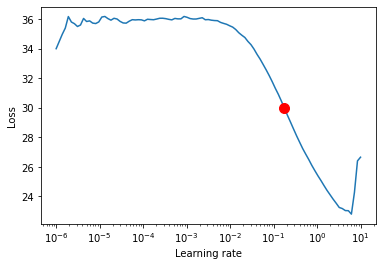

In [ ]:
# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [ ]:
# can be stopped at any point -- did at 24 epochs
# fit network
trainer.fit(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
)


   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 24    
4  | static_variable_selection          | VariableSelectionNetwork        | 324   
5  | encoder_variable_selection         | VariableSelectionNetwork        | 324   
6  | decoder_variable_selection         | VariableSelectionNetwork        | 324   
7  | static_context_variable_selection  | GatedResidualNetwork            | 648   
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 648   
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 648 

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning:

Detected KeyboardInterrupt, attempting graceful shutdown...



1

#### Forecasting

In [ ]:
# can cancel, but wait after clicking -- take time to cancel
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=100, #200,
    max_epochs=10,#50
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 128),
    hidden_continuous_size_range=(8, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)


In [ ]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [ ]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(52.3685)

In [ ]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

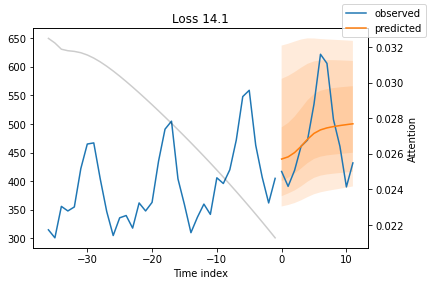

In [ ]:
for idx in range(1):  # plot 10 examples
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);

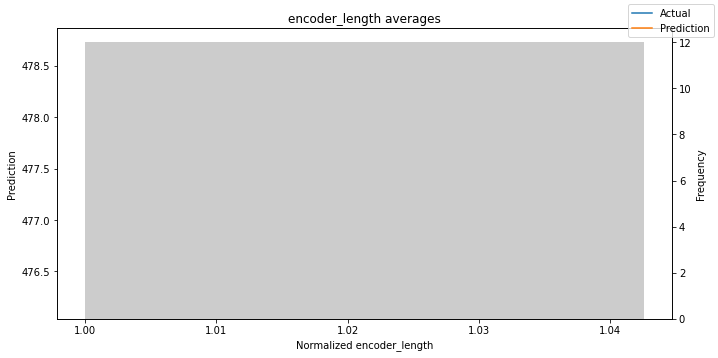

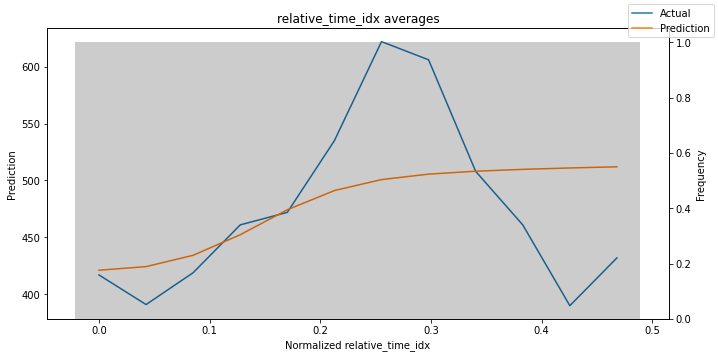

In [ ]:
predictions, x = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(x, predictions)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals);

## N-BEATS
Neural Basis Expansion Analysis for Interpretable Time Series (N-BEATS) (https://arxiv.org/abs/1905.10437)

"N-BEATS: Neural Basis Expansion Analysis for Interpretable Time Series Forecasting",
Boris N. Oreshkin, Dmitri Carpov, Nicolas Chapados, Yoshua Bengio, May 2019, ICLR 2020 (https://arxiv.org/abs/1905.10437)

Time Series Forecast for:
- multi-horizons
- multiple series
- interpretabilities: seasonality and trend

>"Pure DL using no time-series specific components outperforms well-established statistical approaches on M3, M4 and TOURISM datasets (on M4, by 11% over statistical benchmark, by 7% over the best statistical entry, and by 3% over the M4 competition winner)."

Architectural design:
- simple and generic, yet expressive (deep). 
- not rely on timeseries-specific feature engineering or input scaling for pure DL architecture in TS forecasting. 
- explore interpretability, extendable towards making its outputs human interpretable. 
![n-beats](https://d3i71xaburhd42.cloudfront.net/13c185b8c461034af2634f25dd8a85889e8ee135/3-Figure1-1.png)

Model types in the notations:
- I : interpretability
- G : general
- G+I : ensembles with I and G

Interpretabilities:
- Trend
- Seasonality
![n-beats](https://d3i71xaburhd42.cloudfront.net/13c185b8c461034af2634f25dd8a85889e8ee135/8-Figure2-1.png)

Performance: Compare to M4, M3 competition
![N-BEATS Performance](https://d3i71xaburhd42.cloudfront.net/13c185b8c461034af2634f25dd8a85889e8ee135/6-Table2-1.png)

Ref:
- Paper: https://arxiv.org/abs/1905.10437
- https://medium.com/@kshavgupta47/n-beats-neural-basis-expansion-analysis-for-interpretable-time-series-forecasting-91e94c830393
- https://github.com/philipperemy/n-beats

## N-BEATS Code

### Install libraries

In [ ]:
#!pip install pytorch_lightning==1.0.1
# did not restart after installing pytorch_forcasting 0.5.0, so the latest version might have worked now

In [ ]:
!pip install pytorch_lightning #==1.0.2 #0.10.0 # -- bad dataset error 'TimeSeriesDataSet' object has no attribute 'args'
#deep copy issue with leaf node in latest 0.5.2 for N-BEATs, start 0.5.0 has N-Beats and TFT
!pip install pytorch_forecasting==0.5.0

### Load data

In [ ]:
#https://pytorch-forecasting.readthedocs.io/en/latest/tutorials/ar.html

import pandas as pd
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping

from pytorch_forecasting import TimeSeriesDataSet, NBeats, Baseline
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.data.examples import generate_ar_data
from pytorch_forecasting.metrics import SMAPE


In [ ]:
#generate random dataset (choose this or the top cell)
data = generate_ar_data(seasonality=10.0, timesteps=400, n_series=100, seed=42)
data["static"] = 2
data["date"] = pd.Timestamp("2020-01-01") + pd.to_timedelta(data.time_idx, "D")
data.head()

In [ ]:
# create dataset and dataloaders
max_encoder_length = 60
max_prediction_length = 12 #20

training_cutoff = data["time_idx"].max() - max_prediction_length

context_length = max_encoder_length
prediction_length = max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="value",
    categorical_encoders={"series": NaNLabelEncoder().fit(data.series)},
    group_ids=["series"],
    # only unknown variable is "value" - and N-Beats can also not take any additional variables
    time_varying_unknown_reals=["value"],
    max_encoder_length=context_length,
    max_prediction_length=prediction_length,
)

validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training_cutoff+1)
batch_size = 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)


In [ ]:
# calculate baseline absolute error
actuals = torch.cat([y for x, y in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
SMAPE()(baseline_predictions, actuals)

In [ ]:
pl.seed_everything(42)
trainer = pl.Trainer(gpus=0, gradient_clip_val=0.1)
net = NBeats.from_dataset(training, learning_rate=3e-2, weight_decay=1e-2, widths=[32, 512], backcast_loss_ratio=1.0)


### Training

In [ ]:
# find optimal learning rate
res = trainer.tuner.lr_find(net, train_dataloader=train_dataloader, val_dataloaders=val_dataloader, min_lr=1e-5)
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()
net.hparams.learning_rate = res.suggestion()

In [ ]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
trainer = pl.Trainer(
    max_epochs=100,
    gpus=0,
    weights_summary="top",
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback],
    limit_train_batches=30,
)


net = NBeats.from_dataset(training, learning_rate=4e-3, log_interval=10, log_val_interval=1, weight_decay=1e-2, widths=[32, 512], backcast_loss_ratio=1.0)

trainer.fit(
    net, train_dataloader=train_dataloader, val_dataloaders=val_dataloader,
)

### Prediction

In [ ]:
#evaluate result
best_model_path = trainer.checkpoint_callback.best_model_path
best_model = NBeats.load_from_checkpoint(best_model_path)
actuals = torch.cat([y for x, y in iter(val_dataloader)])
predictions = best_model.predict(val_dataloader)
(actuals - predictions).abs().mean()


In [ ]:
raw_predictions, x = best_model.predict(val_dataloader, mode="raw", return_x=True)
for idx in range(10):  # plot 10 examples
    best_model.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);


### Using AirPassenger data

In [ ]:
# using AirPassengers
# download data file
!curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv

import pandas as pd
import numpy as np

df = pd.read_csv('AirPassengers.csv')

data = df
data.dtypes #Month object
data['date2'] = pd.DatetimeIndex(data['Month'])
df.dtypes   #Month datetime64[ns]

data.index  #RangeIndex(start=0, stop=144, step=1)
#data = data.set_index('date2')
data.index  #DatetimeIndex([...dtype='datetime64[ns]', name='Month', length=144, freq=None)
data["series"] = 0
data["time_idx"] = np.arange(len(df))
data["value"] = data["AirPassengers"]
data["date"] = pd.Timestamp("2020-01-01") + pd.to_timedelta(data.time_idx, "D")
a = list(np.arange(12)+1)
from itertools import cycle, islice
df['static'] = list(islice(cycle(a), len(df))) # cycle from 1-12 to represent months
data.head(2)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1748  100  1748    0     0  15200      0 --:--:-- --:--:-- --:--:-- 15200


,Month,AirPassengers,date2,series,time_idx,value,date,static
0,1949-01,112,1949-01-01,0,0,112,2020-01-01,1
1,1949-02,118,1949-02-01,0,1,118,2020-01-02,2


In [ ]:
# copy just needed columns
cols = ["series","time_idx", "value", "static", "date"]
data["value"]= data["value"].astype(float)
data = data[cols]
data

,series,time_idx,value,static,date
0,0,0,112.0,1,2020-01-01
1,0,1,118.0,2,2020-01-02
2,0,2,132.0,3,2020-01-03
3,0,3,129.0,4,2020-01-04
4,0,4,121.0,5,2020-01-05
...,...,...,...,...,...
139,0,139,606.0,8,2020-05-19
140,0,140,508.0,9,2020-05-20
141,0,141,461.0,10,2020-05-21
142,0,142,390.0,11,2020-05-22


In [ ]:
#data.loc[data["value"]==419]
#data.loc[data["value"]>300, ["series"]] = 1

In [ ]:
# create dataset and dataloaders
max_encoder_length = 60
max_prediction_length = 12 #20

training_cutoff = data["time_idx"].max() - max_prediction_length

context_length = max_encoder_length
prediction_length = max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="value",
    categorical_encoders={"series": NaNLabelEncoder().fit(data.series)},
    group_ids=["series"],
    # only unknown variable is "value" - and N-Beats can also not take any additional variables
    time_varying_unknown_reals=["value"],
    max_encoder_length=context_length,
    max_prediction_length=prediction_length,
    allow_missings=True,
)

validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training_cutoff+1)
batch_size = 12
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)


In [ ]:
# calculate baseline absolute error
actuals = torch.cat([y for x, y in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
SMAPE()(baseline_predictions, actuals)

tensor(0.1612)

In [ ]:
pl.seed_everything(42)
trainer = pl.Trainer(gpus=0, gradient_clip_val=0.1)
net = NBeats.from_dataset(training, learning_rate=3e-2, weight_decay=1e-2, widths=[12, 512], backcast_loss_ratio=1.0)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning:

You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores



  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 1.7 M 



suggested learning rate: 0.02818382931264452


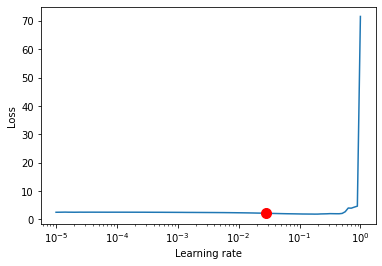

In [ ]:
# find optimal learning rate
res = trainer.tuner.lr_find(net, train_dataloader=train_dataloader, val_dataloaders=val_dataloader, min_lr=1e-5)
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()
net.hparams.learning_rate = res.suggestion()

In [ ]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
trainer = pl.Trainer(
    max_epochs=100,
    gpus=0,
    weights_summary="top",
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback],
    limit_train_batches=12,
)


net = NBeats.from_dataset(training, learning_rate=4e-1, 
                          log_interval=10, log_val_interval=1, weight_decay=1e-1, widths=[12, 512], backcast_loss_ratio=0.5)

trainer.fit(
    net, train_dataloader=train_dataloader, val_dataloaders=val_dataloader,
)

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning:

You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 1.7 M 


1

In [ ]:
#evaluate result
best_model_path = trainer.checkpoint_callback.best_model_path
best_model = NBeats.load_from_checkpoint(best_model_path)
actuals = torch.cat([y for x, y in iter(val_dataloader)])
predictions = best_model.predict(val_dataloader)
(actuals - predictions).abs().mean()


tensor(26.4242)

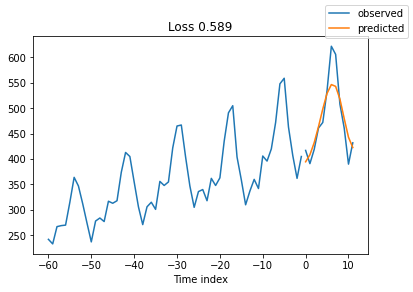

In [ ]:
raw_predictions, x = best_model.predict(val_dataloader, mode="raw", return_x=True)
best_model.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True);


In [ ]:
# calc MAE
print(raw_predictions['prediction'])
#print("\nx enc target:")
#print(x['encoder_target'])
print("\nx dec target:")
print(x['decoder_target'])
mae = abs(x['decoder_target'] - raw_predictions['prediction']).mean()
print('MAE:', mae)

tensor([[394.6180, 408.5150, 432.2117, 463.6022, 498.4454, 529.2542, 546.5840,
         543.0352, 517.9543, 479.6361, 442.8989, 422.6818]])

x dec target:
tensor([[417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390., 432.]])
MAE: tensor(26.4242)


## Summary

In deep learning, the sequence to sequence approach like RNN and LSTM does shows some promise but required a different architecture and finetuning.

TFT and N-BEATS are the lastest approaches that are the current state of the arts. They outperformed previous approaches and winner in the M4 competition.
